# Introduction
This part of the repository builds a detection system based on YOLOv4 object detector.

# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/dezeenAI /mydrive

In [3]:
%cd /mydrive

/content/gdrive/My Drive/Colab Notebooks/dezeenAI


## Libraries & functions
- `cv2` - computer vision library
- `matplotlib.pyplot` - visualisation & plotting library
- `sys` - system-specific parameters and functions
- `os.path` - common pathname manipulations

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os.path

#Darknet YOLOv4
YOLO (*You Only Look Once*) is an object detection system in real-time that recognizes various objects in a single enclosure. Currently it's one of the fastest and most precise object recognition systems.

Paper: [YOLOv4: Optimal Speed and Accuracy of Object Detection](https://arxiv.org/abs/2004.10934)

Code: [AlexeyAB/darknet](https://github.com/AlexeyAB/darknet)

Medium article: [YOLOv4 — the most accurate real-time neural network on MS COCO dataset.](https://medium.com/@alexeyab84/yolov4-the-most-accurate-real-time-neural-network-on-ms-coco-dataset-73adfd3602fe)

## Clone the repository
Let's first clone the official Darknet repository.

In [5]:
# !git clone https://github.com/AlexeyAB/darknet

## GPU, OpenCV & CUDA
In order for the processing to run faster it's better to enable GPU acceleration within Colab notebook which will make the runtime 100 times faster. In order for Darknet to work propely we need to enable OpenCV and CUDA as well. To do so:

1. Navigate to `Edit -> Notebook settings -> Hardware Accelerator: GPU`
2. Use `sed -i` bash command to write some lines in-place to the `Makefile` to enable OpenCV, GPU and CUDNN.

In [6]:
# %cd /mydrive/darknet
# !sed -i 's/OPENCV=0/OPENCV=1/' Makefile
# !sed -i 's/GPU=0/GPU=1/' Makefile
# !sed -i 's/CUDNN=0/CUDNN=1/' Makefile
# !sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

## Verify CUDA
CUDA is a parallel computing platform and application programming interface model created by Nvidia. It allows to use a CUDA-enabled graphics processing unit.

In [7]:
# !/usr/local/cuda/bin/nvcc --version

## Make Darknet
`make` command builds Darknet and creates executables to run or train object detectors

In [8]:
# !make

## Weights
YOLOv4 comes with pre-trained weights trained on 80 object categories of [MS COCO Dataset](https://cocodataset.org/) which is a good starting point for further development. Let's download them from the official Darknet repository using `wget`.

In [9]:
!wget -nc https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# Detection model

## Helper functions

In [10]:
def showIMG(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(
      image,
      (3*width, 3*height),
      interpolation = cv2.INTER_CUBIC
      )

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(
      cv2.cvtColor(
          resized_image,
          cv2.COLOR_BGR2RGB
          )
      )
  plt.show()

## Out of the box
Darknet is now built and ready to run detections using YOLOv4 and pre-trained weights. It can already detect 80 classes of COCO Dataset. Let's test its performance on a pre-uploaded test picture.

- `./darknet detector test` - YOLOv4 detection function
- `coco.data` - dataset configuration
- `yolov4.cfg` - system architecture configuration
- `yolov4.weights` - pre-trained weights
- `-dont_show` - skips outputting the prediction picture (Notebook shows an error when trying to display the prediction) 
- `-tresh 0.5` - sets the treshold value for predictions

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64

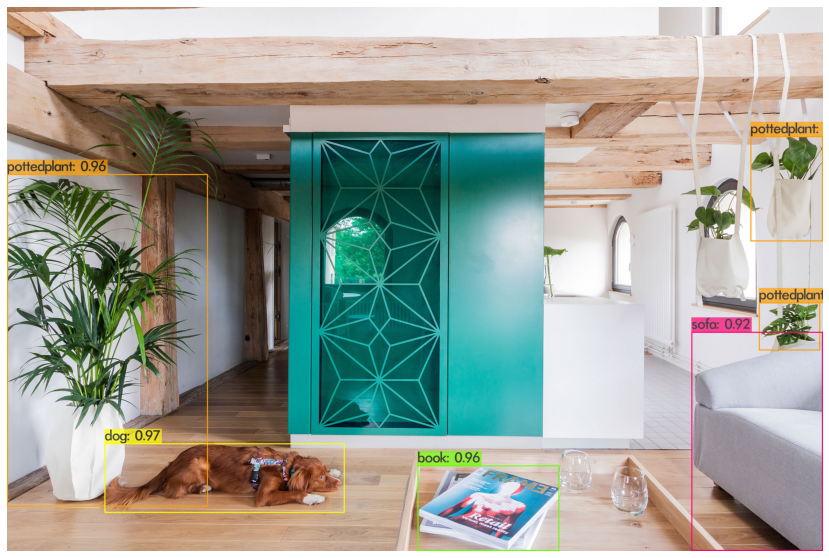

In [11]:
%cd darknet
!chmod +x ./darknet
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show -thresh 0.5 /mydrive/files/test.jpg 
showIMG('predictions.jpg')

## Detection detail export
Let's save image detection details of multiple images into a .JSON file.
- `-ext_output` - outputs bounding boxes coordinates
- `-out` - saves the prediction output to an external file
- `test_results.json` - contains saved data
- `test_images.txt` - contains list of images to evaluate

In [14]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -thresh 0.5 -dont_show -ext_output -out /mydrive/files/test_results.json < /mydrive/files/test_images.txt

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  

# Custom model
Let's now build a custom object detection model based on the downloaded Open Images Dataset using YOLOv4.

https://github.com/AlexeyAB/darknet#how-to-train-to-detect-your-custom-objects

## Classes

In [15]:
classes = [
           'Sink',
           'Stairs',
           'Chair',
           'Cabinetry',
           'Desk',
           'Studio couch',
           'Couch',
           'Door',
           'Shower',
           'Wardrobe',
           'Nightstand',
           'Bathtub',
           'Houseplant',
           'Sofa bed',
           'Curtain',
           'Bed',
           'Fireplace',
           'Bookcase',
           'Table',
           'Mirror',
           'Chest of drawers',
           'Cupboard',
           'Coffee table',
           'Toilet',
           'Bench',
           'Window',
           'Closet',
           'Lamp',
           'Drawer',
           'Stool'
           ]

## Architecture configuration

Copy the original configuration file and perform a find-and-replace on it based on our new dataset.

- `WIDTH` & `HEIGHT` - network size as a value multiple of 32 (typically 416)
- `NUMBER_OF_CLASSES` - number of classes to train
- `MAX_BATCHES` - maximum number of samples to be propagated through the network equal `NUMBER_OF_CLASSES * 2000`
- `STEPS` - 80% & 90% of `MAX_BATCHES` in each of the `[yolo]` layers
- `FILTERS` - `3*(NUMBER_OF_CLASSES + 5)` in each of the `[convolutional]` layer before `[yolo]` layers




In [16]:
%cd /mydrive/files/

!cp /mydrive/darknet/cfg/yolov4-custom.cfg /mydrive/files/yolov4-test.cfg

WIDTH = 416
WIDTH_ARG = 's/width=608/width={}/'.format(WIDTH)
HEIGHT = 416
HEIGHT_ARG = 's/height=608/height={}/'.format(HEIGHT)
NUMBER_OF_CLASSES = len(classes)
NUMBER_OF_CLASSES_ARG = 's/classes=80/classes={}/'.format(NUMBER_OF_CLASSES)
MAX_BATCHES = int(NUMBER_OF_CLASSES * 2000)
MAX_BATCHES_ARG = 's/max_batches\ =\ 500500/max_batches={}/'.format(MAX_BATCHES) # not less than 6000
STEPS = int(0.8*MAX_BATCHES), int(0.9*MAX_BATCHES)
STEPS_ARG = 's/steps=400000,450000/steps={},{}/'.format(STEPS[0],STEPS[1])
FILTERS = int(3*(NUMBER_OF_CLASSES + 5))
FILTERS_ARG = 's/filters=255/filters={}/'.format(FILTERS)

!sed -i {WIDTH_ARG} yolov4-test.cfg
!sed -i {HEIGHT_ARG} yolov4-test.cfg
!sed -i {NUMBER_OF_CLASSES_ARG} yolov4-test.cfg
!sed -i {MAX_BATCHES_ARG} yolov4-test.cfg
!sed -i {STEPS_ARG} yolov4-test.cfg
!sed -i {FILTERS_ARG} yolov4-test.cfg

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/files


## Object names
Create a new file `obj.names` with names of the classes (one per line).

***Note:*** *If a class name has more than one word you need to replace spaces with underscore*


In [17]:
with open('/mydrive/files/obj.names', 'w') as output:
    output.write('\n'.join([cls.replace(' ', '_') for cls in classes]))

## Datasets file lists
Create a list of files for both train and validation sets.

### Train

In [ ]:
image_files = []
DIR = '/mydrive/data/oid/train/{}/'.format('_'.join(classes))
os.chdir(DIR)

for filename in os.listdir(os.getcwd()):
  if filename.endswith('.jpg'):
    image_files.append(DIR + filename)

with open('/mydrive/files/train.txt', 'w') as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write('\n')
    outfile.close()

### Validation

In [ ]:
image_files = []
DIR = '/mydrive/data/oid/validation/{}/'.format('_'.join(classes))
os.chdir(DIR)

for filename in os.listdir(os.getcwd()):
  if filename.endswith('.jpg'):
    image_files.append(DIR + filename)

with open('/mydrive/files/valid.txt', 'w') as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write('\n')
    outfile.close()

##  Data configuration
Create a new file `obj.data` to put together data info.
- `classes` - number of classes to train
- `train` - list of files in the train dataset
- `valid` - list of files in the validation dataset
- `names` - list of classes' names
- `backup` - a directory to store partial and final weights

In [18]:
with open('/mydrive/files/obj.data', 'w') as output:
    output.write(
        '''classes = {}
        train = /mydrive/files/train.txt
        valid = /mydrive/files/valid.txt
        names = /mydrive/files/obj.names
        backup = /mydrive/data/'''.format(len(classes))
    )

# Custom detector

## Download pre-trained weights

In [ ]:
!wget -nc https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

/content/gdrive/My Drive/Colab Notebooks/dezeenAI/files


## Train the model

- `detector`:
- `train`:
- `obj.data`: number and names of classes, list of train/val images, backup directory
- `yolov4-obj.cfg`: neural network architecture configuration
- `yolov4-obj_last.weights`: weights file
- `-dont_show`: suppress the display of an image
- `-map`:


In [ ]:
%cd /mydrive/files/
!chmod +x /mydrive/darknet/darknet
# !/mydrive/darknet/darknet detector train /mydrive/files/obj.data /mydrive/files/yolov4-obj.cfg /mydrive/data/yolov4.conv.137 -dont_show -map
!/mydrive/darknet/darknet detector train obj.data yolov4-obj.cfg yolov4-obj_last.weights -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.672726, GIOU: 0.637503), Class: 0.991313, Obj: 0.153902, No Obj: 0.000270, .5R: 1.000000, .75R: 0.000000, count: 3, class_loss = 0.704299, iou_loss = 0.442179, total_loss = 1.146478 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 161 Avg (IOU: 0.756328, GIOU: 0.739269), Class: 0.898477, Obj: 0.443157, No Obj: 0.002621, .5R: 1.000000, .75R: 0.500000, count: 8, class_loss = 1.152707, iou_loss = 0.383281, total_loss = 1.535988 
 total_bbox = 152236, rewritten_bbox = 0.777083 % 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 139 Avg (IOU: 0.807068, GIOU: 0.804794), Class: 0.967637, Obj: 0.002077, No Obj: 0.000014, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.250287, iou_loss = 6.770397, total_loss = 7.020685 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 150 Avg (IOU: 0.698891, GIOU: 0.676555), Class: 0.986740, Obj: 0.172384, No O

In [ ]:
showIMG('chart.png')

NameError: ignored

# References

- https://www.analyticssteps.com/blogs/introduction-yolov4
- https://www.youtube.com/watch?v=mmj3nxGT2YQ
- https://blog.roboflow.com/training-yolov4-on-a-custom-dataset/
- https://github.com/pjreddie/darknet/issues/1088
- https://medium.com/ai-world/how-to-train-yolov4-for-custom-objects-detection-in-google-colab-1e934b8ef685
- https://stackoverflow.com/questions/64022836/how-to-train-new-classes-on-pretrained-yolov4-model-in-darknet
- https://github.com/DucLeTrong/YOLOv4_with_OpenImagesV4_GoogleColab 


function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)




function ClickConnect(){

console.log("Working"); 
document.querySelector("#comments > span").click() 
}
setInterval(ClickConnect,5000)




https://stackoverflow.com/questions/57113226/how-to-prevent-google-colab-from-disconnecting

I tried the codes above but they did not work for me. So here is my JS code for reconnecting.

let interval = setInterval(function(){
let ok = document.getElementById('ok');
if(ok != null){
   console.log("Connect pushed");
ok.click();
}},60000)
You can use it with the same way (run it on the console of your browser) to run it. If you want to stop the script, you can enter clearInterval(interval) and want to run again setInterval(interval).

I hope this helps you.



function ClickConnect(){
console.log("Working"); 
document.querySelector("paper-icon-button").click()
}
Const myjob = setInterval(ClickConnect, 60000)



function ClickRefresh(){
    console.log("Clicked on refresh button"); 
    document.querySelector("paper-icon-button").click()
}
setInterval(ClickRefresh, 60000)

Version 2: If you would like to be able to stop the function, here is the new code:

var startClickConnect = function startClickConnect(){
    var clickConnect = function clickConnect(){
        console.log("Connnect Clicked - Start");
        document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
        console.log("Connnect Clicked - End"); 
    };

    var intervalId = setInterval(clickConnect, 60000);

    var stopClickConnectHandler = function stopClickConnect() {
        console.log("Connnect Clicked Stopped - Start");
        clearInterval(intervalId);
        console.log("Connnect Clicked Stopped - End");
    };

    return stopClickConnectHandler;
};

var stopClickConnect = startClickConnect();
In order to stop, call:

stopClickConnect();